In [1]:
# pip install seaborn

In [2]:
# Importing libraries 
import numpy as np 
import pandas as pd 
from scipy.stats import mode 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix 

%matplotlib inline

In [14]:
# Reading the train.csv by removing the 
# last column since it's an empty column 
DATA_PATH = "dataset/Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1) 

# Checking whether the dataset is balanced or not 
disease_counts = data["prognosis"].value_counts() 

disease_counts

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

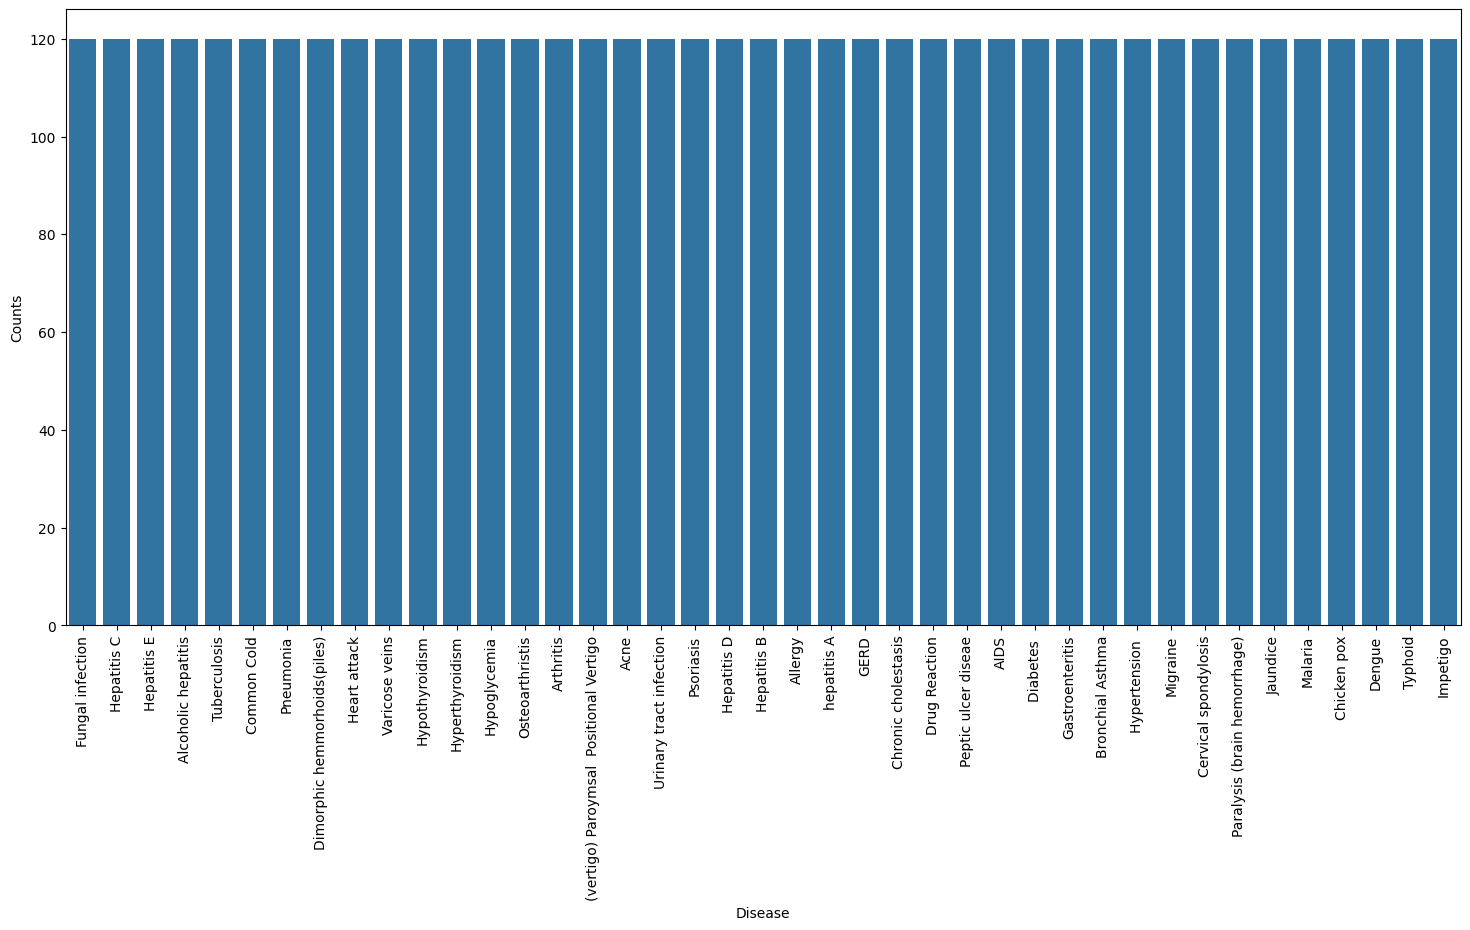

In [4]:
temp_df = pd.DataFrame({ 
	"Disease": disease_counts.index, 
	"Counts": disease_counts.values 
}) 

plt.figure(figsize = (18,8)) 
sns.barplot(x = "Disease", y = "Counts", data = temp_df) 
plt.xticks(rotation=90) 
plt.show()

In [5]:
# Encoding the target value into numerical 
# value using LabelEncoder 
encoder = LabelEncoder() 
data["prognosis"] = encoder.fit_transform(data["prognosis"]) 

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

In [6]:
X = data.iloc[:,:-1] 
y = data.iloc[:, -1] 
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 24) 

print(f"Train: {X_train.shape}, {y_train.shape}") 
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [7]:
# Defining scoring metric for k-fold cross validation 
def cv_scoring(estimator, X, y): 
	return accuracy_score(y, estimator.predict(X)) 

# Initializing Models 
models = { 
	"SVC":SVC(), 
	"Gaussian NB":GaussianNB(), 
	"Random Forest":RandomForestClassifier(random_state=18) 
} 

# Producing cross validation score for the models 
for model_name in models: 
	model = models[model_name] 
	scores = cross_val_score(model, X, y, cv = 10, 
							n_jobs = -1, 
							scoring = cv_scoring) 
	print("=="*30) 
	print(model_name) 
	print(f"Scores: {scores}") 
	print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier : 100.0
Accuracy on test data by SVM Classifier : 100.0


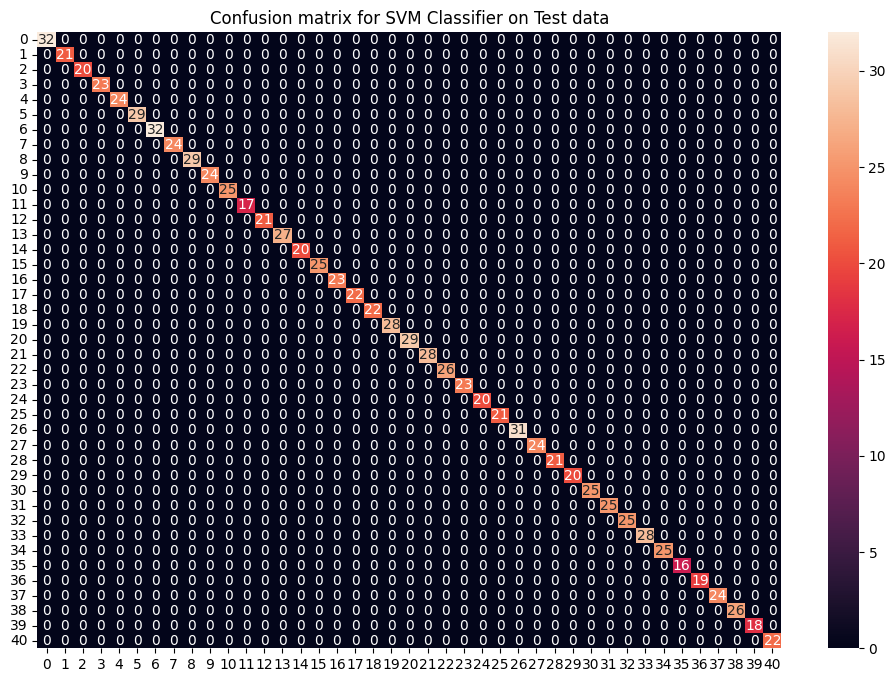

In [8]:
rf_model = SVC()
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier : {accuracy_score(y_train, rf_model.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier : {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion matrix for SVM Classifier on Test data")
plt.show()

Accuracy on train data by GNB Classifier : 100.0
Accuracy on test data by GNB Classifier : 100.0


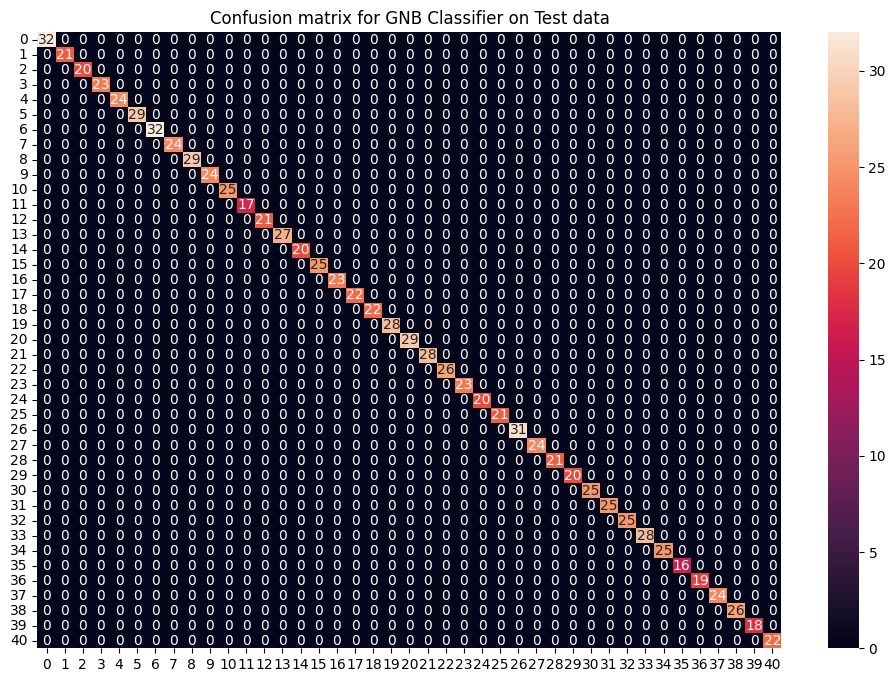

In [9]:
rf_model = GaussianNB()
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

print(f"Accuracy on train data by GNB Classifier : {accuracy_score(y_train, rf_model.predict(X_train))*100}")
print(f"Accuracy on test data by GNB Classifier : {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion matrix for GNB Classifier on Test data")
plt.show()

Accuracy on train data by RandomForest Classifier : 100.0
Accuracy on test data by RandomForest Classifier : 100.0


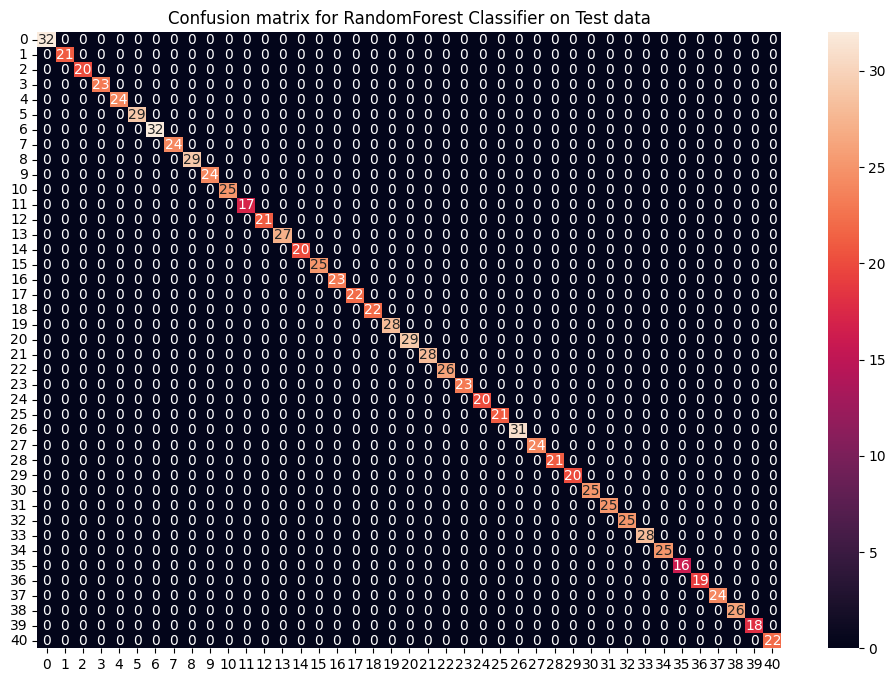

In [10]:
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

print(f"Accuracy on train data by RandomForest Classifier : {accuracy_score(y_train, rf_model.predict(X_train))*100}")
print(f"Accuracy on test data by RandomForest Classifier : {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion matrix for RandomForest Classifier on Test data")
plt.show()

[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27 15]
Accuracy on Test dataset by the combined model: 100.0


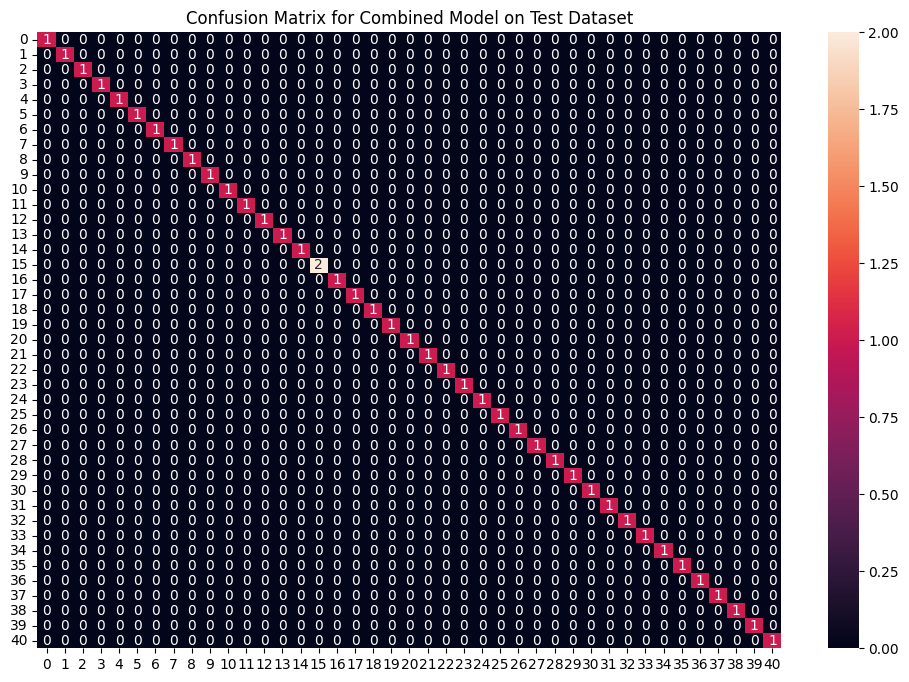

In [11]:
# Training the models on whole data 
final_svm_model = SVC() 
final_nb_model = GaussianNB() 
final_rf_model = RandomForestClassifier(random_state=18) 
final_svm_model.fit(X, y) 
final_nb_model.fit(X, y) 
final_rf_model.fit(X, y) 

# Reading the test data 
test_data = pd.read_csv("./dataset/Testing.csv").dropna(axis=1) 

test_X = test_data.iloc[:, :-1] 
test_Y = encoder.transform(test_data.iloc[:, -1]) 

# Making prediction by take mode of predictions 
# made by all the classifiers 
svm_preds = final_svm_model.predict(test_X) 
print(svm_preds)
nb_preds = final_nb_model.predict(test_X) 
rf_preds = final_rf_model.predict(test_X) 

final_preds = [mode([i,j,k])[0] for i,j, 
			k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}") 

cf_matrix = confusion_matrix(test_Y, final_preds) 
plt.figure(figsize=(12,8)) 

sns.heatmap(cf_matrix, annot = True) 
plt.title("Confusion Matrix for Combined Model on Test Dataset") 
plt.show()


In [12]:
symptoms = X.columns.values 
  
# Creating a symptom index dictionary to encode the 
# input symptoms into numerical form 
symptom_index = {} 
for index, value in enumerate(symptoms): 
    symptom = " ".join([i.capitalize() for i in value.split("_")]) 
    symptom_index[symptom] = index 
  
data_dict = { 
    "symptom_index":symptom_index, 
    "predictions_classes":encoder.classes_ 
} 

def predictDisease(symptoms):
    print(f"For symptoms {symptoms}")
    symptoms = symptoms.split(",")
    
    input_data = [0] * len(data_dict["symptom_index"]) 
    for symptom in symptoms: 
        index = data_dict["symptom_index"][symptom] 
        input_data[index] = 1

    input_data = np.array(input_data).reshape(1,-1) 
    rf_prediction = final_rf_model.predict(input_data)[0] #data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    print(f'RF: {data_dict["predictions_classes"][rf_prediction]}')

    nb_prediction = final_nb_model.predict(input_data)[0]
    print(f'NB: {data_dict["predictions_classes"][nb_prediction]}')

    svm_prediction = final_svm_model.predict(input_data)[0]
    print(f'SVM: {data_dict["predictions_classes"][svm_prediction]}')
    
    modeOut = mode([rf_prediction, nb_prediction,svm_prediction])[0]

    return data_dict["predictions_classes"][modeOut]

print(f"Final Prognosis is: {predictDisease('Itching,Skin Rash,Nodal Skin Eruptions')}")

For symptoms Itching,Skin Rash,Nodal Skin Eruptions
RF: Fungal infection
NB: Fungal infection
SVM: Fungal infection
Final Prognosis is: Fungal infection


c:\Users\ssharma\AppData\Local\miniforge3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\ssharma\AppData\Local\miniforge3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\ssharma\AppData\Local\miniforge3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
